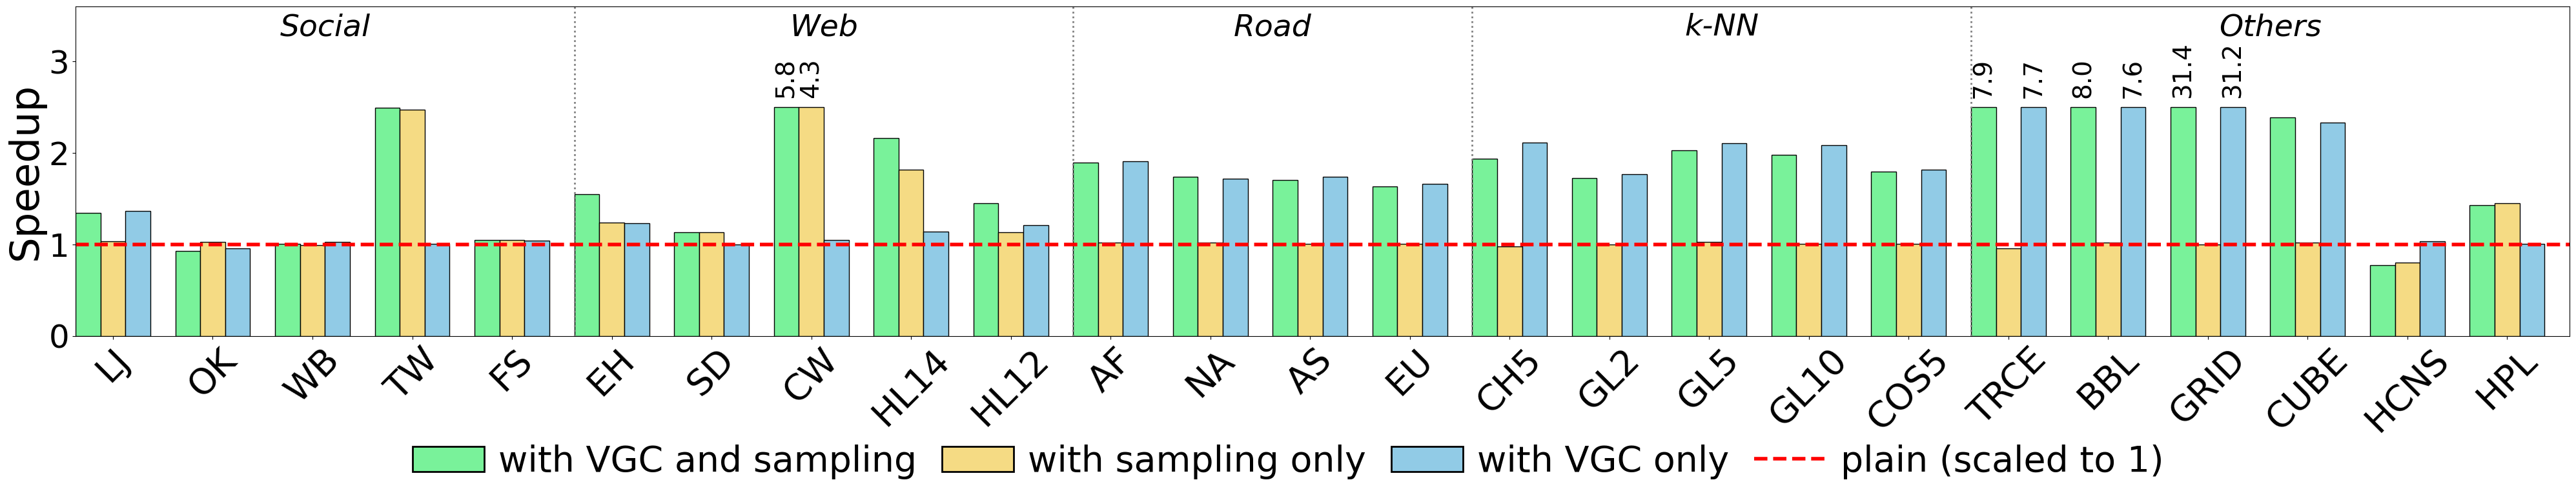

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

from matplotlib.lines import Line2D

file_path = './../data/ours_details.csv' 
data = pd.read_csv(file_path, keep_default_na=False)
data.columns = data.columns.str.strip() 

data['w/ both'] = pd.to_numeric(data['w/ both'], errors='coerce')
data['w/o local search'] = pd.to_numeric(data['w/o local search'], errors='coerce')
data['w/o sampling'] = pd.to_numeric(data['w/o sampling'], errors='coerce')
data['plain'] = pd.to_numeric(data['plain'], errors='coerce')

categories = data['Category'].unique()

palette = ["#79f29a", "#f5db84", "#91cbe6", "#2092a4"]

fig, ax = plt.subplots(figsize=(40, 7))

def plot_bars(ax, data_subset):
    index = 0
    bar_width = 0.25
    category_positions = []
    
    ax.set_ylim([0, 3.6])  # Adjust the y-limit as needed
    subset_categories = data_subset['Category'].unique()
    
    for category in subset_categories:
        subset = data_subset[data_subset['Category'] == category]
        category_index = np.arange(len(subset)) + index

        limited_both = subset['w/ both'].apply(lambda x: min(x, 2.5) if pd.notna(x) else x)
        limited_local_search = subset['w/o local search'].apply(lambda x: min(x, 2.5) if pd.notna(x) else x)
        limited_sampling = subset['w/o sampling'].apply(lambda x: min(x, 2.5) if pd.notna(x) else x)
        limited_plain = subset['plain'].apply(lambda x: min(x, 2.5) if pd.notna(x) else x)

        bars1 = ax.bar(category_index - 1.5 * bar_width, limited_both, bar_width, label='w/ both', color=palette[0], edgecolor='black')
        bars2 = ax.bar(category_index - 0.5 * bar_width, limited_local_search, bar_width, label='w/o local search', color=palette[1], edgecolor='black')
        bars3 = ax.bar(category_index + 0.5 * bar_width, limited_sampling, bar_width, label='w/o sampling', color=palette[2], edgecolor='black')

        for i, (bar1, bar2, bar3) in enumerate(zip(bars1, bars2, bars3)):
            both_value = subset.iloc[i]['w/ both']
            local_search_value = subset.iloc[i]['w/o local search']
            sampling_value = subset.iloc[i]['w/o sampling']

            if both_value > 2.5:
                ax.text(bar1.get_x() + bar1.get_width() / 2, 2.6, f'{both_value:.1f}', ha='center', va='bottom', fontsize=28, color='black', rotation=90)
            if local_search_value > 2.5:
                ax.text(bar2.get_x() + bar2.get_width() / 2, 2.6, f'{local_search_value:.1f}', ha='center', va='bottom', fontsize=28, color='black', rotation=90)
            if sampling_value > 2.5:
                ax.text(bar3.get_x() + bar3.get_width() / 2, 2.6, f'{sampling_value:.1f}', ha='center', va='bottom', fontsize=28, color='black', rotation=90)

        category_start = category_index[0] - 1.5 * bar_width
        category_end = category_index[-1] + 1.5 * bar_width
        category_midpoint = (category_start + category_end) / 2
        category_positions.append((category_start, category_end, category_midpoint))

        index += len(subset) 

    ax.set_xticks(np.arange(len(data_subset)) - bar_width / 2)
    ax.set_xticklabels(data_subset['Graph'], rotation=45, fontsize=40)
    # ax.set_yticklabels(np.arange(0,4), fontsize=36)
    # ax.set_yticklabels(np.arange(0,4,1), fontsize=36)
    # make y tick labels dont larger
    ax.tick_params(axis='y', labelsize=36)
    for i in range(len(category_positions) - 1):
        midpoint = (category_positions[i][1] + category_positions[i + 1][0]) / 2
        ax.axvline(x=midpoint, color='grey', linestyle=':', linewidth=2, label='_nolegend_')

    for position, category in zip(category_positions, subset_categories):
        ax.text(position[2], 0.98, category, ha='center', va='top', fontsize=34, 
                transform=ax.get_xaxis_transform(), fontstyle='italic')

    ax.set_xlim([min(np.arange(len(data_subset))) - bar_width * 2,
                 max(np.arange(len(data_subset))) + bar_width * 2])
    ax.set_ylabel('Speedup', fontsize=45)

plot_bars(ax, data)

x_values = np.linspace(-0.5, len(data) - 0.5, len(data))
limited_ours = data['plain'].apply(lambda x: min(x, 4) if pd.notna(x) else x)

ax.plot(x_values, limited_ours, linestyle='--', linewidth=4, color='red')

handles = [
    Rectangle((0, 0), 1, 1, facecolor=palette[0], edgecolor='black', linewidth=2, label='with VGC and sampling'),
    Rectangle((0, 0), 1, 1, facecolor=palette[1], edgecolor='black', linewidth=2, label='with sampling only'),
    Rectangle((0, 0), 1, 1, facecolor=palette[2], edgecolor='black', linewidth=2, label='with VGC only'),
    # Rectangle((0, 0), 1, 1, facecolor=palette[3], edgecolor='black', linewidth=2, label='plain'),
    Line2D([0], [0], linestyle='--', linewidth=4, color='red', label='plain (scaled to 1)'),

]

fig.legend(
    handles=handles, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 0.08), 
    fontsize=40, 
    frameon=True,
    ncol=5, 
    handletextpad=0.4,  
    columnspacing=0.7,  
    borderpad=0.4,
    edgecolor='none'
)

# ax.set_title('Speedup Between the Two Optimizations', fontsize=46, pad=20)

fig.tight_layout()
fig.savefig('speedup_comparison_one_axis.pdf', bbox_inches='tight')
plt.show()
